<a href="https://colab.research.google.com/github/oilportrait/test_colab/blob/main/ANN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!jupyter nbconvert --to html /content/ANN_test.ipynb

[NbConvertApp] Converting notebook /content/ANN_test.ipynb to html
[NbConvertApp] Writing 1200255 bytes to /content/ANN_test.html


In [ ]:
import pandas as pd
targetUrl = "https://raw.githubusercontent.com/oilportrait/test_colab/main/diabetes_prediction_dataset.csv"
df = pd.read_csv(targetUrl, sep=',')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df = df.drop_duplicates()
df.diabetes.value_counts(normalize = True).mul(100)

0    91.178
1     8.822
Name: diabetes, dtype: float64

In [ ]:
cat_cols = [x for x in df.dtypes.index if df.dtypes[x] == 'object']
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


gender:
Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

smoking_history:
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64


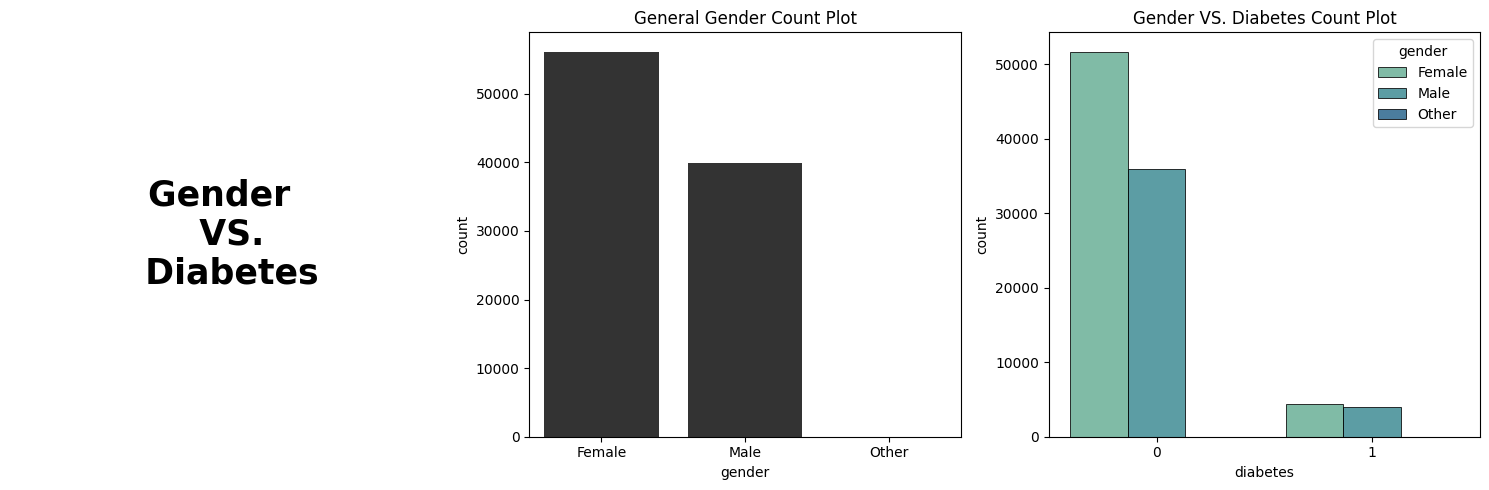

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (15,5))

ax = plt.subplot(1,3,1)
ax.text(0.5, 0.5, "Gender \n  VS. \n Diabetes", fontdict={'fontsize': 25, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')


plt.subplot(1,3, 2)

sns.countplot(x = df['gender'], color = "black",  alpha = 0.8, saturation =1)

plt.title("General Gender Count Plot")


plt.subplot(1,3, 3)
sns.countplot( x = df['diabetes'], hue = df['gender'],   palette='crest', linewidth = 0.7, alpha = 0.8, edgecolor = 'k', saturation =1)
plt.title("Gender VS. Diabetes Count Plot")

plt.tight_layout()
plt.show()

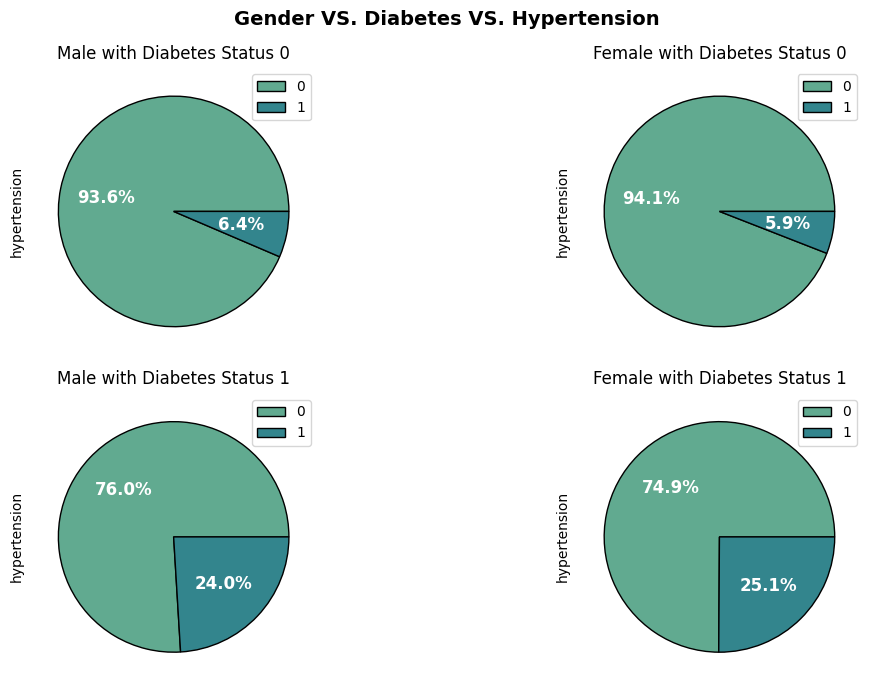

In [ ]:
fig = plt.figure(figsize=(13, 7))
subgroups = [('Male', 0), ('Female', 0), ('Male', 1), ('Female', 1)]


colors = sns.color_palette("crest", 3)


for i, subgroup in enumerate(subgroups):
    gender, diabetes = subgroup
    ax = plt.subplot(2, 2, i + 1)
    data = df[(df['gender'] == gender) & (df['diabetes'] == diabetes)]
    wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}
    textprops = {'color': 'white', 'fontsize': 12, 'fontweight': 'bold'}
    data['hypertension'].value_counts().plot(kind='pie', colors=colors, wedgeprops=wedgeprops, textprops=textprops, autopct='%1.1f%%')

    plt.title(f'{gender} with Diabetes Status {diabetes}')

    plt.legend()

fig.suptitle("Gender VS. Diabetes VS. Hypertension", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

그래프를 보면 성별은 당뇨병, 고혈압 발병 유무와 독립임을 유추할 수 있습니다. 

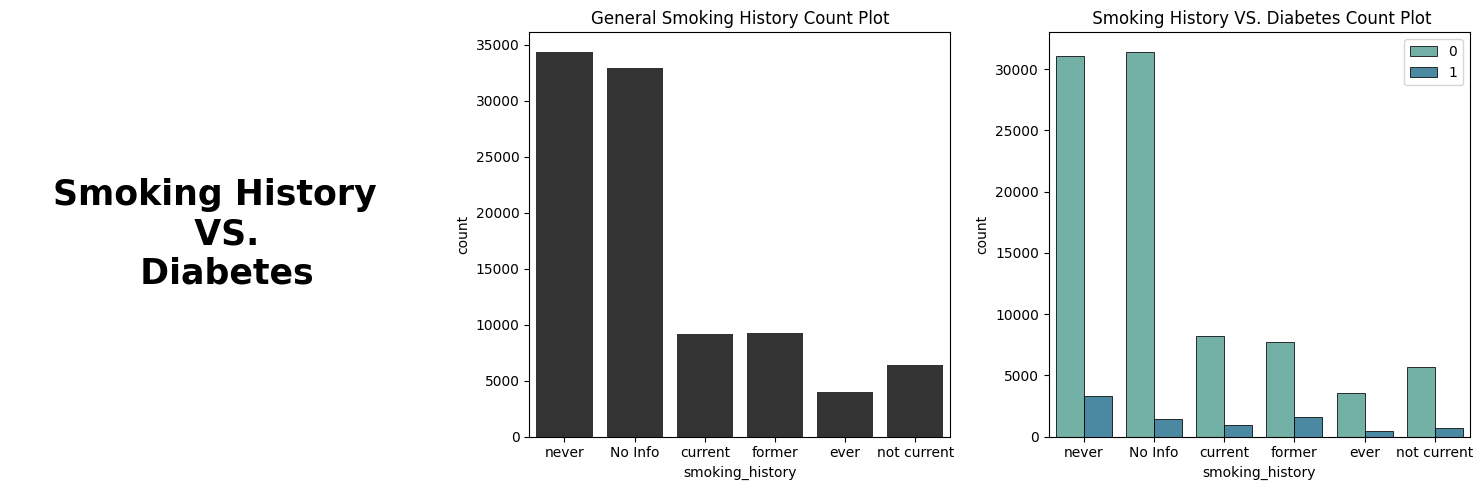

In [ ]:
fig = plt.figure(figsize = (15,5))

ax = plt.subplot(1,3,1)
ax.text(0.5, 0.5, "Smoking History \n  VS. \n Diabetes", fontdict={'fontsize': 25, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.set_facecolor("#97C8A7")
ax.axis('off')



plt.subplot(1,3, 2)
counts = df['smoking_history'].value_counts().reset_index().sort_values(by = 'smoking_history', ascending = False)
sns.countplot(x = 'smoking_history', data = df, color = "black", alpha = 0.8, saturation =1)
plt.title("General Smoking History Count Plot")


plt.subplot(1,3, 3)
sns.countplot( x =df['smoking_history'] , hue = df['diabetes'] ,   palette='crest', linewidth = 0.7, edgecolor = 'k', saturation =1, alpha = 0.8)
plt.title(" Smoking History VS. Diabetes Count Plot")



plt.legend()
plt.tight_layout()
plt.show()

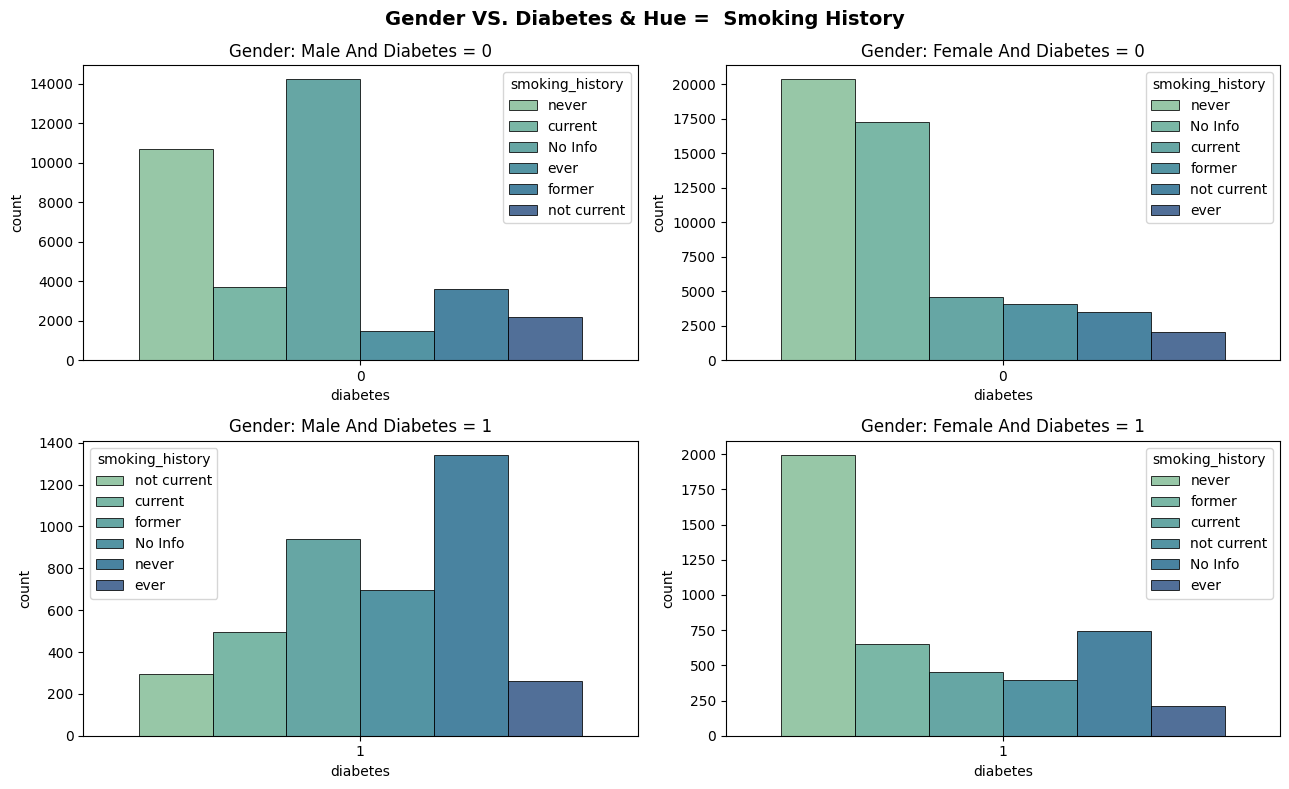

In [ ]:
fig = plt.figure(figsize = (13,8))

df_male = df[(df.gender == 'Male') & (df.diabetes == 0)]
plt.subplot(2,2,1)
sns.countplot(x= df_male.diabetes, hue = df_male.smoking_history,  linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
plt.title("Gender: Male And Diabetes = 0")

plt.subplot(2,2,2)
df_female = df[(df.gender == 'Female') & (df.diabetes == 0)]
sns.countplot(x= df_female.diabetes, hue = df_female.smoking_history,  linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
plt.title("Gender: Female And Diabetes = 0")

df_male = df[(df.gender == 'Male') & (df.diabetes == 1)]
plt.subplot(2,2,3)
sns.countplot(x= df_male.diabetes, hue = df_male.smoking_history,  linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
plt.title("Gender: Male And Diabetes = 1")

plt.subplot(2,2,4)
df_female = df[(df.gender == 'Female') & (df.diabetes == 1)]
sns.countplot(x= df_female.diabetes, hue = df_female.smoking_history,  linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
plt.title("Gender: Female And Diabetes = 1")
fig.suptitle("Gender VS. Diabetes & Hue =  Smoking History", fontsize=14, fontweight='bold')





plt.tight_layout()

plt.show()

In [ ]:
pd.crosstab(df.gender, df.smoking_history, margins = True)

smoking_history,No Info,current,ever,former,never,not current,All
gender,,,,,,,
Female,17969,5011,2236,4743,22339,3863,56161
Male,14912,4186,1761,4556,12056,2496,39967
Other,6,0,1,0,3,8,18
All,32887,9197,3998,9299,34398,6367,96146


성별이 정말로 각 열과 연관이 크게 없는지 확인 하기 위해서 피어슨 상관계수를 구합니다.

In [ ]:
df['gender'] = df['gender'].map({'Female':0, 'Male':1, 'Other':2})
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
numeric_columns = df.select_dtypes(include='number').columns
correlation_matrix = df[numeric_columns].corr()
correlation_matrix = df.corr(numeric_only=True)

print(correlation_matrix)

                          age  hypertension  heart_disease       bmi  \
age                  1.000000      0.257305       0.238451  0.344797   
hypertension         0.257305      1.000000       0.119982  0.148111   
heart_disease        0.238451      0.119982       1.000000  0.061376   
bmi                  0.344797      0.148111       0.061376  1.000000   
HbA1c_level          0.106719      0.081441       0.068140  0.084423   
blood_glucose_level  0.114317      0.084834       0.070832  0.092543   
diabetes             0.264927      0.195710       0.170711  0.214932   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.106719             0.114317  0.264927  
hypertension            0.081441             0.084834  0.195710  
heart_disease           0.068140             0.070832  0.170711  
bmi                     0.084423             0.092543  0.214932  
HbA1c_level             1.000000             0.171615  0.406408  
blood_glucose_level     0.1

성별은 각 상관계수가 0.0..으로 굉장히 낮은 값을 지니므로 성별은 이 데이터에서 제거되도 문제가 없다고 생각했습니다.

In [ ]:
df.drop('gender', axis=1, inplace=True)
df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,never,25.19,6.6,140,0
1,54.0,0,0,No Info,27.32,6.6,80,0
2,28.0,0,0,never,27.32,5.7,158,0
3,36.0,0,0,current,23.45,5.0,155,0
4,76.0,1,1,current,20.14,4.8,155,0


결측치로서 존재하는 No info 를 인코딩 한 이후에 knn을 이용해서 값을 채웁니다.

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

In [ ]:
df_encoded.replace("No Info", pd.NA, inplace=True)

In [ ]:
df_encoded.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,never,25.19,6.6,140,0
1,54.0,0,0,<NA>,27.32,6.6,80,0
2,28.0,0,0,never,27.32,5.7,158,0
3,36.0,0,0,current,23.45,5.0,155,0
4,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
label_encoder = LabelEncoder()
categorical_columns = df_encoded.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column].astype(str))

df_encoded.fillna(-1, inplace=True)

In [ ]:
import numpy as np
df_encoded['smoking_history'] = df_encoded['smoking_history'].replace(0, np.nan)

In [ ]:
df_encoded.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,4.0,25.19,6.6,140,0
1,54.0,0,0,NaN,27.32,6.6,80,0
2,28.0,0,0,4.0,27.32,5.7,158,0
3,36.0,0,0,1.0,23.45,5.0,155,0
4,76.0,1,1,1.0,20.14,4.8,155,0


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df_encoded[["smoking_history"]] = imputer.fit_transform(df_encoded[["smoking_history"]])

In [ ]:
df_encoded.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,4.000000,25.19,6.6,140,0
1,54.0,0,0,3.391091,27.32,6.6,80,0
2,28.0,0,0,4.000000,27.32,5.7,158,0
3,36.0,0,0,1.000000,23.45,5.0,155,0
4,76.0,1,1,1.000000,20.14,4.8,155,0


In [ ]:
df_encoded["smoking_history"] = [round(value) for value in df_encoded["smoking_history"]]

In [ ]:
df_encoded.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,4,25.19,6.6,140,0
1,54.0,0,0,3,27.32,6.6,80,0
2,28.0,0,0,4,27.32,5.7,158,0
3,36.0,0,0,1,23.45,5.0,155,0
4,76.0,1,1,1,20.14,4.8,155,0


early stopping을 사용해서 신경망 학습을 시도합니다.

In [ ]:
import sklearn
features = [col for col in df_encoded.columns if col != 'diabetes']
X = df_encoded[features]
y = df_encoded['diabetes']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
import sklearn

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=15, batch_size=32,validation_split=0.2, callbacks=[early_stopping])
train_loss = history.history['loss']
val_loss = history.history['val_loss']


Epoch 1/15
1923/1923 [==============================] - 10s 5ms/step - loss: 0.2804 - accuracy: 0.9137 - val_loss: 0.2031 - val_accuracy: 0.9328
Epoch 2/15
1923/1923 [==============================] - 7s 4ms/step - loss: 0.2223 - accuracy: 0.9247 - val_loss: 0.2138 - val_accuracy: 0.9311
Epoch 3/15
1923/1923 [==============================] - 8s 4ms/step - loss: 0.1909 - accuracy: 0.9331 - val_loss: 0.1886 - val_accuracy: 0.9394
Epoch 4/15
1923/1923 [==============================] - 10s 5ms/step - loss: 0.1643 - accuracy: 0.9416 - val_loss: 0.1493 - val_accuracy: 0.9512
Epoch 5/15
1923/1923 [==============================] - 7s 4ms/step - loss: 0.1536 - accuracy: 0.9459 - val_loss: 0.1794 - val_accuracy: 0.9331
Epoch 6/15
1923/1923 [==============================] - 9s 5ms/step - loss: 0.1409 - accuracy: 0.9501 - val_loss: 0.1215 - val_accuracy: 0.9589
Epoch 7/15
1923/1923 [==============================] - 10s 5ms/step - loss: 0.1420 - accuracy: 0.9495 - val_loss: 0.1287 - val_accura

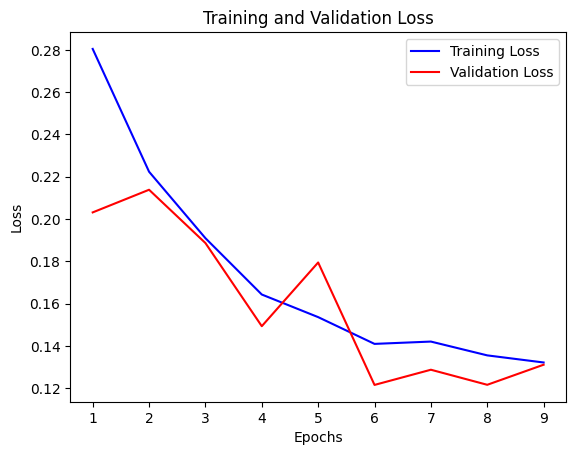

In [ ]:
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
k = 5
X = df_encoded.drop("diabetes", axis=1).values
y = df_encoded["diabetes"].values

kf = KFold(n_splits=k, shuffle=True)

accuracies = []
losses = []

for train_index, val_index in kf.split(X):
  X_train, X_val = X[train_index], X[val_index]
  y_train, y_val = y[train_index], y[val_index]
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
  loss, accuracy = model.evaluate(X_val, y_val)
  losses.append(loss)
  accuracies.append(accuracy)
avg_loss = np.mean(losses)
avg_accuracy = np.mean(accuracies)

print("Average Loss:", avg_loss)
print("Average Accuracy:", avg_accuracy)

601/601 [==============================] - 2s 2ms/step - loss: 0.1255 - accuracy: 0.9550
Average Loss: 0.12261139154434204
Average Accuracy: 0.95668044090271


이번엔 initialization, L2 regularity, batch normalization을 시도해보겠습니다

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score

custom_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
input_dim = df_encoded.drop("diabetes", axis=1).shape[1]
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=input_dim, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, input_dim=input_dim),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    layers.Dense(1, activation='sigmoid', kernel_initializer=custom_initializer)
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Epoch 1/10
2404/2404 [==============================] - 12s 4ms/step - loss: 0.1642 - accuracy: 0.9494
Epoch 2/10
2404/2404 [==============================] - 12s 5ms/step - loss: 0.1288 - accuracy: 0.9564
Epoch 3/10
2404/2404 [==============================] - 12s 5ms/step - loss: 0.1235 - accuracy: 0.9573
Epoch 4/10
2404/2404 [==============================] - 11s 4ms/step - loss: 0.1192 - accuracy: 0.9586
Epoch 5/10
2404/2404 [==============================] - 11s 4ms/step - loss: 0.1148 - accuracy: 0.9597
Epoch 6/10
2404/2404 [==============================] - 10s 4ms/step - loss: 0.1142 - accuracy: 0.9601
Epoch 7/10
2404/2404 [==============================] - 10s 4ms/step - loss: 0.1133 - accuracy: 0.9600
Epoch 8/10
2404/2404 [==============================] - 11s 5ms/step - loss: 0.1139 - accuracy: 0.9597
Epoch 9/10
2404/2404 [==============================] - 11s 5ms/step - loss: 0.1124 - accuracy: 0.9611
Epoch 10/10
601/601 [==============================] - 2s 3ms/step
Test A

기존의 ANN과 정확도 차이가 크지 않음을 알수 있습니다.

drop out을 시도해보겠습니다.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_dim=input_dim),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

601/601 [==============================] - 1s 2ms/step
Accuracy: 0.9105044201768071


Epoch 1/3
2404/2404 [==============================] - 11s 4ms/step - loss: 0.5102 - accuracy: 0.8925 - val_loss: 0.2516 - val_accuracy: 0.9214
Epoch 2/3
2404/2404 [==============================] - 18s 7ms/step - loss: 0.2393 - accuracy: 0.9233 - val_loss: 0.2069 - val_accuracy: 0.9290
Epoch 3/3
601/601 [==============================] - 2s 3ms/step


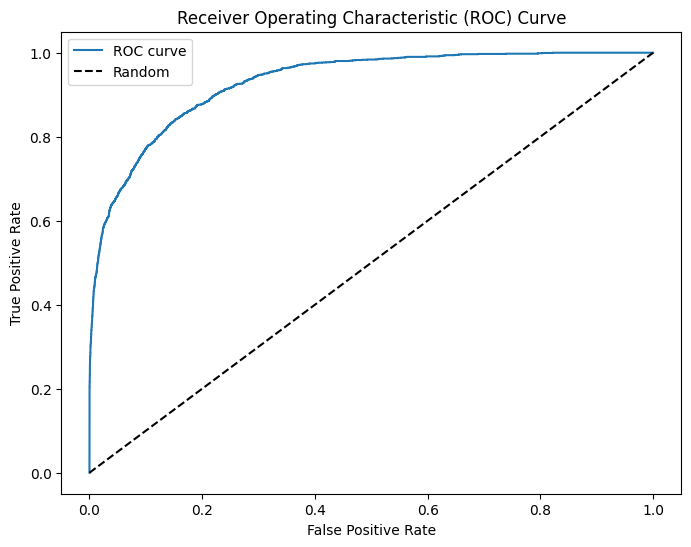

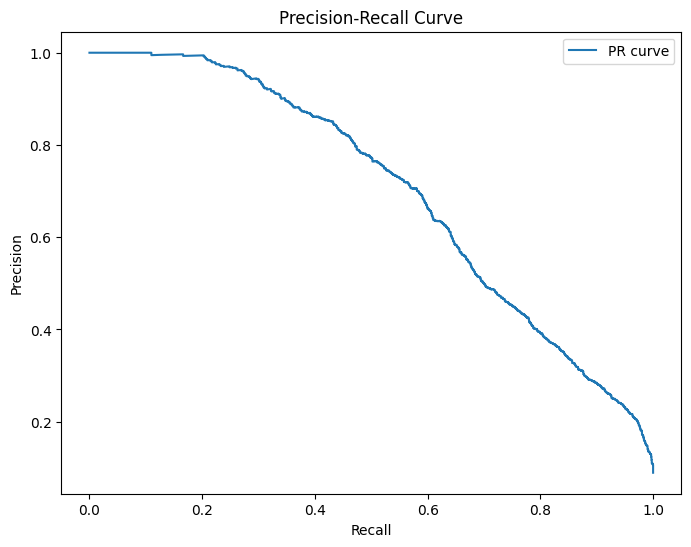

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=input_dim),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_val, y_val))

y_pred_prob = model.predict(X_test)

y_pred_prob = y_pred_prob.flatten()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

의도적으로 drop put을 하고 epoch를 줄여서 pr, roc 커브를 그려보았습니다.